## Import part

In [1]:
# *************************************
# coded by Kosuke Sato from 2018.08.08
# *************************************
import sys
import cmath
import math
import os
import time
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

#import utility

## Read files

In [2]:
f = open("SubPc-C60_wB97XD_frequency.txt","r")
L = f.readlines()
f.close()

## extract spectra

In [3]:
l_w = []; l_Iw = []
Nsteps = len(L) -4
for sn in xrange(Nsteps):
        sp = L[sn+4].split()
        l_w.append(float(sp[0]))
        l_Iw.append(float(sp[1]))
I_Max = max(l_Iw)

l_w = np.array(l_w); l_Iw = np.array(l_Iw)

## Now, plot I(w).

In [6]:
def plot_spectra(l_w, l_Iw, I_Max, color, ls,fig_name):
    # [in] ene: dictionary including energies
    # [in] colors: list of colors ("black", "red", etc...)
    # [in] lss: list of linestyles ("-", "-.")
    # [in] labs: list of labels (shows the kind of data)
    # [in] pax: read in plt.axis(); this must be a list [xmin, xmax, ymin, ymax]
    # [in] bbox: where the legends are shown
    # [in] ylabel: label on y-axis
    # [in] p1: fitting parameters
    plt.clf() # initialization
    plt.figure(figsize=(15, 10))
    plt.subplot(1,1,1)
    plt.axis([0.0,2000,0.00, 1.0])
    plt.tick_params(direction="in")
    plt.rcParams["font.family"] = "Tahoma"
    plt.rcParams["axes.linewidth"] = 1.5
    plt.tick_params(direction="in")
    plt.rcParams["xtick.major.size"] = 10
    plt.rcParams["xtick.major.width"] = 1.5
    plt.rcParams["ytick.major.size"] = 10
    plt.rcParams["ytick.major.width"] = 1.5
    plt.rcParams["font.size"] = 40
    plt.xlabel("frequency, cm$^{-1}$")
    plt.ylabel("Intensity, arb. units")
    plt.tick_params(labelleft='off')
    plt.plot(l_w, l_Iw/I_Max, color=color, linewidth=3.5, linestyle=ls)
    plt.arrow(840, 0.95, 0, -0.2,width=20,head_width=50.0, head_length=0.1, color = "black")
    plt.arrow(1000, 0.95, 0, -0.27,width=20,head_width=50.0, head_length=0.1, color = "black")
    plt.arrow(1530, 0.95, 0, -0.30,width=20,head_width=50.0, head_length=0.1, color = "black")
    plt.savefig(fig_name,bbox_inches="tight",dpi=600)
    plt.show()

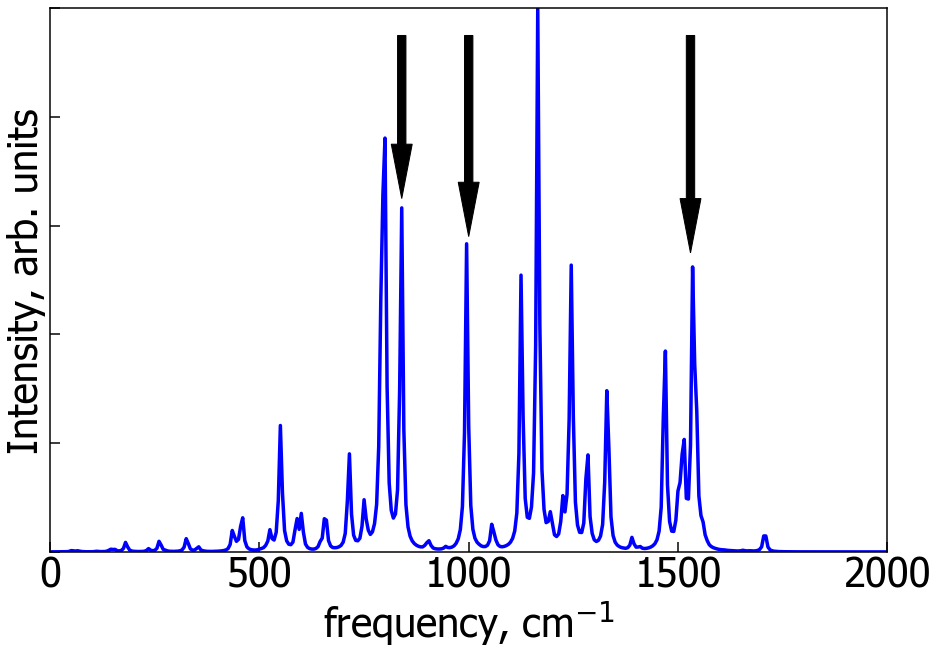

In [9]:
plot_spectra(l_w, l_Iw, I_Max,"blue","-", "SubPc-C60_frequency_spectra.eps")